# Analysis!

In [1]:
import sqlite3
import pandas as pd
# import csv

import matplotlib.pyplot as plt

# sklearn k means clustering?

Grab dataframe

In [2]:
conn = sqlite3.connect('data/choice.db')
query = 'SELECT posting_date FROM prediction'
df = pd.read_sql_query(query, conn)

df['posting_date'] = pd.to_datetime(df['posting_date'])

print(df)

conn.close()

       posting_date
0        2003-01-08
1        2003-01-08
2        2003-01-08
3        2003-01-08
4        2002-12-20
...             ...
406611   2024-06-03
406612   2024-06-03
406613   2024-06-03
406614   2024-06-03
406615   2024-06-03

[406616 rows x 1 columns]


Donation needs to be ordered by date, consider date format.

Date samples:
0   01/08/2003
1   01/08/2003
2   01/08/2003
3   01/08/2003
4   12/20/2002
5   12/20/2002
6   12/20/2002
7   12/27/2002
8   12/27/2002
9   12/27/2002

Now in terms of df timestamp.

Consider excluding donations from natural disasters?

Visualize donation trend.

In [5]:
conn = sqlite3.connect('data/choice.db')
cursor = conn.cursor()

donor_totals_query = """
SELECT donor_id, COUNT(*)
FROM prediction
GROUP BY donor_id
"""

cursor.execute(donor_totals_query)
donor_totals = cursor.fetchall()

print(donor_totals)

conn.close()

[(None, 88), ('8thAvenue', 15), ('AGRUSA', 1), ('Abbott', 1614), ('Aldi', 3), ('AllenCanning', 51), ('Armour', 26), ('Athens', 169), ('Atlanta', 699), ('Augusta', 46), ('B&G', 11), ('Barilla', 4988), ('BasicAmerican', 31), ('Bayer', 196), ('Blue Diamond Growers', 42), ('Brill', 10), ('Bumblebee', 54), ('Califia', 6), ('CampbellSoup', 4), ('Cargill', 3), ('Chairmans Foods', 7), ('Chicken of the sea', 1), ('ChickfilA', 3), ('Chobani', 14), ('Clorox', 181), ('CocaCola', 11), ('ConAgraDairy', 426), ('ConAgraFoods', 17444), ('ConAgraFrozen', 837), ('ConAgraGrocery', 1146), ('ConAgraLogistics', 7), ('ConAgraPotato', 2125), ('ConAgraRefrigerated', 9), ('ConAgraSnackFoods', 6), ('Consorzi', 5), ('Continental', 184), ('Danone', 79), ('Delmontefoods', 32), ('DiamondFoods', 42), ('Dole', 151), ('Dunkin', 2), ('Duracell', 30), ('Faribault', 3), ('FarmlandFoods', 2), ('Freiberger', 65), ('Frito', 5), ('GHOST', 26), ('GMILLS', 1808), ('Gmills', 64), ('Headquarters', 12), ('Heinz', 624), ('Henkel', 2

Huge variety of giving frequencies, once to thousands. Reflects the literature.

[(None, 88), ('8thAvenue', 15), ('AGRUSA', 1), ('Abbott', 1614), ('Aldi', 3), ('AllenCanning', 51), ('Armour', 26), ('Athens', 169), ('Atlanta', 699), ('Augusta', 46), ('B&G', 11), ('Barilla', 4988), ('BasicAmerican', 31), ('Bayer', 196), ('Blue Diamond Growers', 42), ('Brill', 10), ('Bumblebee', 54), ('Califia', 6), ('CampbellSoup', 4), ('Cargill', 3), ('Chairmans Foods', 7), ('Chicken of the sea', 1), ('ChickfilA', 3), ('Chobani', 14), ('Clorox', 181), ('CocaCola', 11), ('ConAgraDairy', 426), ('ConAgraFoods', 17444), ('ConAgraFrozen', 837), ('ConAgraGrocery', 1146), ('ConAgraLogistics', 7), ('ConAgraPotato', 2125), ('ConAgraRefrigerated', 9), ('ConAgraSnackFoods', 6), ('Consorzi', 5), ('Continental', 184), ('Danone', 79), ('Delmontefoods', 32), ('DiamondFoods', 42), ('Dole', 151), ('Dunkin', 2), ('Duracell', 30), ('Faribault', 3), ('FarmlandFoods', 2), ('Freiberger', 65), ('Frito', 5), ('GHOST', 26), ('GMILLS', 1808), ('Gmills', 64), ('Headquarters', 12), ('Heinz', 624), ('Henkel', 268), ('HersheyChocolate', 898), ('Hersheychocolate', 48), ('Hormel', 2), ('JRSIMPLOT', 7), ('JohnMorrell', 13), ('Johnson', 23), ('KRAFT', 50698), ('KaChava', 3), ('Karlin', 1), ('Kdrp', 21), ('Kellogg', 174912), ('Kenvue', 183), ('Kikkoman', 38), ('KimClark', 12), ('Kinkos', 13), ('Kraft', 58057), ('KraftBiscuit', 5905), ('LDSChurch', 10), ('LambWeston', 153), ('LandOLakes', 146), ('Lopez Foods', 13), ('MONDELEZ', 22379), ('Macon', 84), ('Mars', 52), ('MarsFood', 200), ('McCainFoods', 75), ('McDonalds', 2), ('MilwaukeeZC', 2), ('Mondelez', 17880), ('Morton', 53), ('NESTLE', 20), ('Nestle', 1994), ('NestleHandHeld', 88), ('Newman', 44), ('Niagara', 17), ('Nutrisystem', 47), ('OceanSpray', 55), ('PACIFICCOASTPRODUCERS', 41), ('PEPSI', 9), ('PGCompany', 14845), ('Panera', 61), ('PatrickCudahy', 4), ('Penske', 2), ('PenskeTX', 60), ('PerdueFarms', 87), ('PinnacleFood', 711), ('Plexus Worldwide', 7), ('PremierNutrition', 137), ('Quaker', 10079), ('RiseBaking', 2), ('SCJohnson', 11), ('SEASHARE', 1), ('SENECA', 1), ('STARBUCKS', 7), ('SaraLeeFB', 44), ('Savannah', 17), ('Schreiber', 149), ('SchwansBakery', 29), ('SchwansFoodServ', 133), ('SchwansGlobal', 16), ('SeaShare', 21), ('Seneca', 63), ('SmithfieldPacking', 4), ('Smithfieldfoods', 8), ('South Beach LLC', 17), ('SouthBeach', 103), ('Southeasternmills', 63), ('StarRDC', 47), ('StarSuppliers', 191), ('Starbucks', 20), ('Sunsweet', 45), ('The Honey Pot Co', 16), ('Tradex', 7), ('TreeHouse', 239), ('TreeHouseFoods', 2035), ('TreeHousePrivateBrands', 2), ('Treehouse', 3), ('Tropicana', 39), ('Tyson', 991), ('UNFI', 23), ('UncleBens', 362), ('Unclebens', 4), ('Unilever', 6), ('Valdosta', 905), ('VictoryPackaging', 4), ('VisualPak', 3), ('VitaCoco', 4), ('WALGREEN', 1), ('WALMART', 16), ('WKKellogg', 69), ('WRIGLEY', 41), ('Walgreen', 242), ('Welchs', 11), ('Wendys', 7), ('WestonFoods', 47), ('Wrigley', 1237), ('Yowie', 10), ('advance', 491), ('aldi', 1), ('aryzta', 1), ('bayer', 23), ('continental', 4), ('cott', 6), ('danone', 8), ('diamondfoods', 32), ('dollargeneral', 5), ('dollartree', 2), ('duracell', 177), ('fano', 4), ('fini', 3), ('frito', 3), ('gmills', 627), ('greenleaf', 6), ('happyhealthy', 75), ('kingarthur', 23), ('kings', 31), ('kraft', 796), ('lambweston', 313), ('mars', 10), ('mondelez', 261), ('nestle', 220), ('panera', 7), ('pgcompany', 70), ('postconsumer', 180), ('scjohnson', 317), ('smucker', 1415), ('snyders', 30), ('starsuppliers', 2), ('sysco', 2), ('target', 1), ('tivityhealth', 1), ('tradex', 14), ('treehouse', 65), ('unclebens', 5), ('voss', 112), ('walgreen', 42), ('wrigley', 48)]

Reliability score for donors.

Binary variable of donor/month.

Each donor needs a column over the entire time series.

In [6]:
conn = sqlite3.connect('data/choice.db')
cursor = conn.cursor()

columns = """
SELECT *
FROM prediction
LIMIT 10
"""

cursor.execute(columns)
donor_totals = cursor.fetchall()

print(donor_totals)

conn.close()

[('01/08/2003', 'ConAgraDairy', 175.0, 'Default Web Warehouse', 'REFRIG'), ('01/08/2003', 'ConAgraDairy', 198.0, 'Default Web Warehouse', 'REFRIG'), ('01/08/2003', 'ConAgraDairy', 253.0, 'Default Web Warehouse', 'REFRIG'), ('01/08/2003', 'ConAgraDairy', 1518.0, 'Default Web Warehouse', 'REFRIG'), ('12/20/2002', 'ConAgraDairy', 17.5, 'Default Web Warehouse', 'REFRIG'), ('12/20/2002', 'ConAgraDairy', 198.0, 'Default Web Warehouse', 'REFRIG'), ('12/20/2002', 'ConAgraDairy', 1464.0, 'Default Web Warehouse', 'REFRIG'), ('12/27/2002', 'ConAgraDairy', 7.5, 'Default Web Warehouse', 'REFRIG'), ('12/27/2002', 'ConAgraDairy', 20.0, 'Default Web Warehouse', 'REFRIG'), ('12/27/2002', 'ConAgraDairy', 20.62, 'Default Web Warehouse', 'REFRIG')]


In [7]:
conn = sqlite3.connect('data/choice.db')

query = """
SELECT *
FROM prediction
"""

df = pd.read_sql_query(query, conn)

conn.close()

print(df)

df['posting_date'] = pd.to_datetime(df['posting_date'])
df['year'] = df['posting_date'].dt.year
df['month'] = df['posting_date'].dt.month

df = df.sort_values(by=['year', 'month']).reset_index(drop=True)

       posting_date      donor_id  gross_weight                branch_code  \
0        01/08/2003  ConAgraDairy        175.00      Default Web Warehouse   
1        01/08/2003  ConAgraDairy        198.00      Default Web Warehouse   
2        01/08/2003  ConAgraDairy        253.00      Default Web Warehouse   
3        01/08/2003  ConAgraDairy       1518.00      Default Web Warehouse   
4        12/20/2002  ConAgraDairy         17.50      Default Web Warehouse   
...             ...           ...           ...                        ...   
406611     6/3/2024      Mondelez       9824.00  1112 Fairburn/Atlanta DHL   
406612     6/3/2024      Mondelez       9976.00  1112 Fairburn/Atlanta DHL   
406613     6/3/2024      Mondelez      58080.00  1112 Fairburn/Atlanta DHL   
406614     6/3/2024        Seneca         60.48                      M & W   
406615     6/3/2024        Seneca         69.12                      M & W   

        storage_code  
0             REFRIG  
1             REF

In [ ]:
# order

# ABOVE

df['posting_date'] = pd.to_datetime(df['posting_date'])
df['year'] = df['posting_date'].dt.year
df['month'] = df['posting_date'].dt.month

df = df.sort_values(by=['year', 'month']).reset_index(drop=True)

In [9]:
print(df)

       posting_date      donor_id  gross_weight  \
0        2002-12-20  ConAgraDairy        17.500   
1        2002-12-20  ConAgraDairy       198.000   
2        2002-12-20  ConAgraDairy      1464.000   
3        2002-12-27  ConAgraDairy         7.500   
4        2002-12-27  ConAgraDairy        20.000   
...             ...           ...           ...   
406611   2024-10-10         Kraft       168.000   
406612   2024-10-10         Kraft       396.630   
406613   2024-10-10         Kraft       396.900   
406614   2024-10-10         Kraft       942.126   
406615   2024-10-10         Kraft      1910.538   

                            branch_code  storage_code  year  month  
0                 Default Web Warehouse        REFRIG  2002     12  
1                 Default Web Warehouse        REFRIG  2002     12  
2                 Default Web Warehouse        REFRIG  2002     12  
3                 Default Web Warehouse        REFRIG  2002     12  
4                 Default Web Warehouse   

In [10]:
df_encoded = pd.get_dummies(df, columns=['donor_id'], dtype=int)

df_numeric = df_encoded.select_dtypes(include='number').copy()

df_numeric['year'] = df_encoded['year']
df_numeric['month'] = df_encoded['month']

df_grouped = df_numeric.groupby(['year', 'month'], as_index=True).sum()

with open('donor_encoding.csv', 'w') as f:
    f.write(df_grouped.to_string())

In [11]:
print(df_grouped.columns)

Index(['gross_weight', 'donor_id_8thAvenue', 'donor_id_AGRUSA',
       'donor_id_Abbott', 'donor_id_Aldi', 'donor_id_AllenCanning',
       'donor_id_Armour', 'donor_id_Athens', 'donor_id_Atlanta',
       'donor_id_Augusta',
       ...
       'donor_id_starsuppliers', 'donor_id_sysco', 'donor_id_target',
       'donor_id_tivityhealth', 'donor_id_tradex', 'donor_id_treehouse',
       'donor_id_unclebens', 'donor_id_voss', 'donor_id_walgreen',
       'donor_id_wrigley'],
      dtype='object', length=189)


In [12]:
df = df_grouped.drop('gross_weight', axis=1)
df = df.applymap(lambda x: 1 if x != 0 else 0)

/var/folders/nd/ltpj3cdx35932ptv34l_50r00000gn/T/ipykernel_7972/1215895914.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x != 0 else 0)


In [13]:
df_sum = df.sum(axis=0)
df_e = df_sum.divide(188)

with open('df_e.csv', 'w') as f:
    f.write(df_e.to_string())

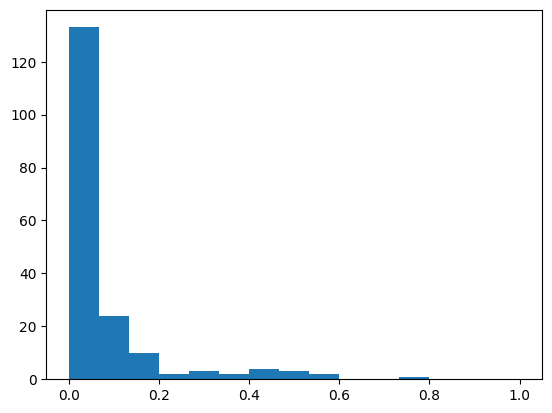

In [14]:
plt.hist(df_e, bins=15, range=[0.0, 1.0])
plt.show()

Histogram of donation frequency is similar to some locations from the paper, fewer truly consistent donors.

In [15]:
# change shape of data for k means clustering

print(df_e)
print(df_e.iloc[2])

donor_id_8thAvenue       0.005319
donor_id_AGRUSA          0.005319
donor_id_Abbott          0.494681
donor_id_Aldi            0.010638
donor_id_AllenCanning    0.042553
                           ...   
donor_id_treehouse       0.053191
donor_id_unclebens       0.005319
donor_id_voss            0.090426
donor_id_walgreen        0.042553
donor_id_wrigley         0.010638
Length: 188, dtype: float64
0.4946808510638298


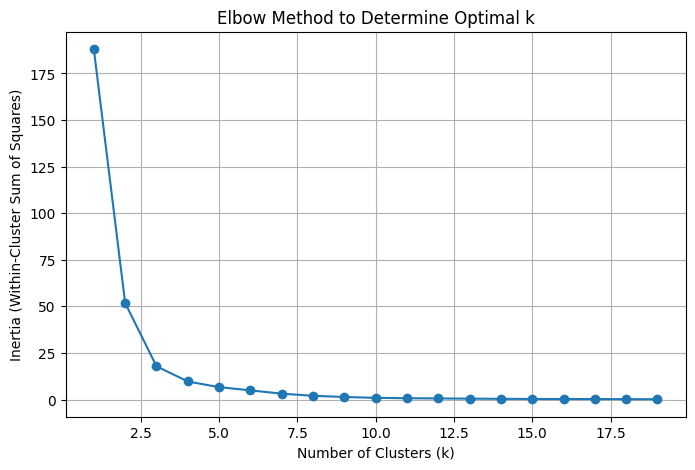

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(df_e)

e_scaled = StandardScaler().fit_transform(df) # this is super important

inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(e_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

# optimal k at 4.

In [18]:
# sklearn, split dataset
# k means on optimal k
# add donor cluster to dataset

km = KMeans(n_clusters=3)
km.fit(e_scaled)
print(km.labels_)

# clustering across multiple dimensions?

[0 0 1 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [ ]:
# TODO: add arima AND prophet models to ensemble search?

# add the labels
# cluster by storage type & label

In [ ]:
# generate the right pandas df

df = df.reset_index()

In [34]:
df.columns = ['donor_id', 'score', 'group']


                  donor_id     score  group
0       donor_id_8thAvenue  0.005319      0
1          donor_id_AGRUSA  0.005319      0
2          donor_id_Abbott  0.494681      1
3            donor_id_Aldi  0.010638      0
4    donor_id_AllenCanning  0.042553      0
..                     ...       ...    ...
183     donor_id_treehouse  0.053191      0
184     donor_id_unclebens  0.005319      0
185          donor_id_voss  0.090426      0
186      donor_id_walgreen  0.042553      0
187       donor_id_wrigley  0.010638      0

[188 rows x 3 columns]


In [39]:
import re

df['donor_id'] = df['donor_id'].str.extract(r'donor_id_(.+)').replace('_', ' ', regex=True)

print(df)

         donor_id     score  group
0       8thAvenue  0.005319      0
1          AGRUSA  0.005319      0
2          Abbott  0.494681      1
3            Aldi  0.010638      0
4    AllenCanning  0.042553      0
..            ...       ...    ...
183     treehouse  0.053191      0
184     unclebens  0.005319      0
185          voss  0.090426      0
186      walgreen  0.042553      0
187       wrigley  0.010638      0

[188 rows x 3 columns]


In [25]:
df.columns = ['donor_id', 'group']

In [42]:
# grab data
# construct data

# Storage requirement: dry, refrigerated, frozen

conn = sqlite3.connect('data/choice.db')

query_all = """
SELECT *
FROM prediction
"""

df_all = pd.read_sql_query(query, conn)

conn.close()

df_all['posting_date'] = pd.to_datetime(df_all['posting_date'])
df_all['year'] = df_all['posting_date'].dt.year
df_all['month'] = df_all['posting_date'].dt.month

df_all = df_all.sort_values(by=['year', 'month']).reset_index(drop=True)

print(df_all)

merged_df = pd.merge(df_all, df, on='donor_id')

print(merged_df)

       posting_date      donor_id  gross_weight  \
0        2002-12-20  ConAgraDairy        17.500   
1        2002-12-20  ConAgraDairy       198.000   
2        2002-12-20  ConAgraDairy      1464.000   
3        2002-12-27  ConAgraDairy         7.500   
4        2002-12-27  ConAgraDairy        20.000   
...             ...           ...           ...   
406611   2024-10-10         Kraft       168.000   
406612   2024-10-10         Kraft       396.630   
406613   2024-10-10         Kraft       396.900   
406614   2024-10-10         Kraft       942.126   
406615   2024-10-10         Kraft      1910.538   

                            branch_code  storage_code  year  month  
0                 Default Web Warehouse        REFRIG  2002     12  
1                 Default Web Warehouse        REFRIG  2002     12  
2                 Default Web Warehouse        REFRIG  2002     12  
3                 Default Web Warehouse        REFRIG  2002     12  
4                 Default Web Warehouse   

In [43]:
merged_df.to_csv("final.csv", index=False)

# Analysis redux

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA # no pmdarima :(
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
df = pd.read_csv("final.csv")
print(df)

# df['posting_date'] = pd.to_datetime(df['posting_date'])

       posting_date      donor_id  gross_weight  \
0        2002-12-20  ConAgraDairy        17.500   
1        2002-12-20  ConAgraDairy       198.000   
2        2002-12-20  ConAgraDairy      1464.000   
3        2002-12-27  ConAgraDairy         7.500   
4        2002-12-27  ConAgraDairy        20.000   
...             ...           ...           ...   
406523   2024-10-10         Kraft       168.000   
406524   2024-10-10         Kraft       396.630   
406525   2024-10-10         Kraft       396.900   
406526   2024-10-10         Kraft       942.126   
406527   2024-10-10         Kraft      1910.538   

                            branch_code  storage_code  year  month     score  \
0                 Default Web Warehouse        REFRIG  2002     12  0.154255   
1                 Default Web Warehouse        REFRIG  2002     12  0.154255   
2                 Default Web Warehouse        REFRIG  2002     12  0.154255   
3                 Default Web Warehouse        REFRIG  2002     12 

In [100]:
def clean_outliers_by_branch_foodtype(df, iqr_thresholds=None):
    """
    Cleans outliers based on IQR per (branch, food_type), not donor_group.
    Applies thresholds and replaces outliers with robust values.
    
    Parameters:
    - df: DataFrame with columns ['date', 'branch', 'food_type', 'donor_group', 'donation_weight']
    - iqr_thresholds: dict like {'BranchName': 1.5, ...}

    Returns:
    - cleaned_df: DataFrame with a new column 'donation_weight_cleaned'
    - reliability_scores: DataFrame with reliability per (branch, food_type)
    """
    from collections import defaultdict
    import numpy as np
    import pandas as pd

    df = df.copy()
    df['posting_date'] = pd.to_datetime(df['posting_date'])

    if iqr_thresholds is None:
        iqr_thresholds = defaultdict(lambda: 1.5)  # default fallback

    cleaned_data = []
    reliability_records = []

    grouped = df.groupby(['branch_code', 'storage_code'])

    for (branch, food_type), group in grouped:
        threshold = iqr_thresholds.get(branch, 1.5)

        # Compute IQR-based bounds
        ts = group.sort_values('posting_date')['gross_weight']
        q1 = ts.quantile(0.25)
        q3 = ts.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - threshold * iqr
        upper = q3 + threshold * iqr
        p80 = ts.quantile(0.8)

        # Apply Sandhills-style cleaning
        ts_clean = ts.copy()
        num_outliers = 0
        for i in range(len(ts)):
            if ts.iloc[i] < lower:
                ts_clean.iloc[i] = q1
                num_outliers += 1
            elif ts.iloc[i] > upper:
                ts_clean.iloc[i] = p80
                num_outliers += 1

        # Apply cleaned series back to all rows (not just this one group)
        cleaned_series = group.copy()
        cleaned_series['donation_weight_cleaned'] = ts_clean.values
        cleaned_data.append(cleaned_series)

        # Compute reliability
        reliability = 1 - (num_outliers / len(ts))
        reliability_records.append({
            'branch_code': branch,
            'storage_code': food_type,
            'reliability_score': reliability
        })

    cleaned_df = pd.concat(cleaned_data)
    reliability_df = pd.DataFrame(reliability_records)

    return cleaned_df, reliability_df

In [101]:
df, reliability = clean_outliers_by_branch_foodtype(df)

In [92]:
import numpy as np
from collections import defaultdict
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def pad_with_nan(arrays):
    """Pads a list of 1D arrays with NaNs to make them same length"""
    max_len = max(len(a) for a in arrays)
    padded = np.full((len(arrays), max_len), np.nan)
    for i, a in enumerate(arrays):
        padded[i, :len(a)] = a
    return padded

In [93]:
def run_arima_model_selection(df, window=24, forecast_horizon=1, arima_order=(1,1,1)):
    results = {}

    grouped = df.groupby(['branch_code', 'storage_code', 'group'])

    for (branch, food_type, donor_group), group in grouped:
        ts = group.set_index('posting_date').resample('M').sum()['gross_weight'].fillna(0)
        if len(ts) <= window + forecast_horizon:
            continue

        actuals = []
        forecasts = []

        for i in range(len(ts) - window - forecast_horizon + 1):
            train = ts[i:i+window]
            test = ts[i+window:i+window+forecast_horizon]

            try:
                model = ARIMA(train, order=arima_order).fit()
                pred = model.forecast(steps=forecast_horizon)[0]
            except:
                pred = train.mean()  # fallback to mean

            forecasts.append(pred)
            actuals.append(test.iloc[0])

        forecasts = np.array(forecasts)
        actuals = np.array(actuals)

        results[(branch, food_type, donor_group)] = {
            'actuals': actuals,
            'forecast': forecasts,
            'MAPE': mape(actuals, forecasts),
            'MAE': mean_absolute_error(actuals, forecasts),
            'RMSE': rmse(actuals, forecasts)
        }

    return results

In [96]:
def aggregate_arima_forecasts_nan_safe(results):
    branch_agg = defaultdict(list)
    actuals_agg = defaultdict(list)

    for (branch, food_type, donor_group), data in results.items():
        branch_agg[branch].append(data['forecast'])
        actuals_agg[branch].append(data['actuals'])

    branch_results = {}

    for branch in branch_agg:
        # Pad all forecast and actual arrays to equal length
        preds_padded = pad_with_nan(branch_agg[branch])
        actuals_padded = pad_with_nan(actuals_agg[branch])

        # Aggregate over donor groups (sum across rows, ignore NaNs)
        pred_sum = np.nansum(preds_padded, axis=0)
        actual_sum = np.nansum(actuals_padded, axis=0)

        # Only compare where both predicted and actual values exist
        mask = ~np.isnan(pred_sum) & ~np.isnan(actual_sum)

        branch_results[branch] = {
            'Forecasts': pred_sum,
            'Actuals': actual_sum,
            'MAPE': mape(actual_sum[mask], pred_sum[mask]),
            'MAE': mean_absolute_error(actual_sum[mask], pred_sum[mask]),
            'RMSE': rmse(actual_sum[mask], pred_sum[mask])
        }

    return branch_results

In [97]:
def generate_composite_forecast_nan_safe(results):
    from collections import defaultdict

    composite_forecast = defaultdict(list)
    actuals_by_branch = defaultdict(list)

    for (branch, food_type, donor_group), data in results.items():
        composite_forecast[branch].append(data['forecast'])
        actuals_by_branch[branch].append(data['actuals'])

    composite_results = {}

    for branch in composite_forecast:
        preds_padded = pad_with_nan(composite_forecast[branch])
        actuals_padded = pad_with_nan(actuals_by_branch[branch])

        pred_sum = np.nansum(preds_padded, axis=0)
        actual_sum = np.nansum(actuals_padded, axis=0)

        mask = ~np.isnan(pred_sum) & ~np.isnan(actual_sum)

        composite_results[branch] = {
            'Forecasts': pred_sum,
            'Actuals': actual_sum,
            'MAPE': mape(actual_sum[mask], pred_sum[mask]),
            'MAE': mean_absolute_error(actual_sum[mask], pred_sum[mask]),
            'RMSE': rmse(actual_sum[mask], pred_sum[mask])
        }

    return composite_results


In [102]:
arima_results = run_arima_model_selection(df, arima_order=(1,1,1))

# Step 2: Aggregated forecasts using NaN-safe padding
aggregated_branch_results = aggregate_arima_forecasts_nan_safe(arima_results)

# Step 3 remains the same (you can also pad Step 3 similarly if needed)
composite_forecasts = generate_composite_forecast_nan_safe(arima_results)

for branch, stats in aggregated_branch_results.items():
    print(f"{branch} - MAPE: {stats['MAPE']:.2f}%, RMSE: {stats['RMSE']:.2f}")

/Users/michi/Emory/aidata/tech-bridge-26/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/michi/Emory/aidata/tech-bridge-26/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/michi/Emory/aidata/tech-bridge-26/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/michi/Emory/aidata/tech-bridge-26/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Like

1112 Fairburn/Atlanta DHL - MAPE: 194.76%, RMSE: 117015.30
1727 US Cold Atlanta - MAPE: 71.87%, RMSE: 2796.45
3109-ConAgra Atlanta Warehouse - MAPE: 1956.69%, RMSE: 26868.54
376-Nordic Rockmart - MAPE: 100.00%, RMSE: 1362.38
5688 Atlanta MARKETPLACE DC - MAPE: 1272.37%, RMSE: 36855.51
ABW - MAPE: 52.49%, RMSE: 103610.39
AMC ATLANTA TRADEWATER - MAPE: 317.88%, RMSE: 75561.22
AMC Gateway - MAPE: 475.59%, RMSE: 78128.35
AMC Tradewater - MAPE: 239.02%, RMSE: 97147.05
ATLANTA - MAPE: 93.24%, RMSE: 22936.55
Albany Branch - MAPE: 72.82%, RMSE: 21034.92
Allens, Inc. - MAPE: 92.29%, RMSE: 78837.94
America's Secnd Harvest of Coastal Georgia - MAPE: 94.15%, RMSE: 90249.64
America's Second Harvest of South Georgia, Inc. - MAPE: 46.71%, RMSE: 43792.99
Americold - MAPE: 63.82%, RMSE: 388.47
Americold Logistics - MAPE: 115.94%, RMSE: 28264.94
Americold Storage - MAPE: 100.00%, RMSE: 1189.54
Americold Tradewater - MAPE: 4300.38%, RMSE: 228806.11
Americold Warehouse (1899) - MAPE: 97.01%, RMSE: 1904.68